In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
df=pd.read_csv('data/runawayfault_L.csv',header=0)
df

In [43]:
pwd

'/Users/kiranprasadjp/Documents/Pros/predictiveModelling-and-faultDetection-in-batchReactors-using-ML'

In [53]:
df=pd.read_csv('raw/Transferlearning/runawayfault.csv',header=0)
df

,Time_min,ReactorTemp,Pressure_bar,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Feed_Flow_m3_s,Coolant_delatT_K
0,0.0,315.668711,1.200000,6.869399,800,0.000000,0.000000,5.077143
1,0.5,315.076239,1.215219,6.900976,800,0.055055,0.000260,8.388683
2,1.0,315.998080,1.239953,6.933023,800,0.429412,0.000527,11.379813
3,1.5,316.129113,1.269303,6.965141,800,0.744117,0.000726,14.081088
4,2.0,316.198951,1.300295,6.997110,800,0.883976,0.000861,16.519993
...,...,...,...,...,...,...,...,...
596,298.0,368.856866,0.950553,14.653645,800,0.989958,0.000004,13.614194
597,298.5,369.473547,0.946166,14.654228,800,0.973200,0.000017,13.400495
598,299.0,369.272046,0.943060,14.654344,800,0.970000,0.000016,13.814680
599,299.5,369.295771,0.939282,14.654600,800,0.986275,0.000012,13.190573


In [55]:
df=pd.read_csv('raw/test/runawayfault.csv',header=0)
df

,Time_min,ReactorTemp,Pressure_bar,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Feed_Flow_m3_s,Coolant_delatT_K
0,0.0,315.877196,1.150000,13.375000,800,0.000000,0.000000,5.077143
1,0.5,315.155562,1.160729,13.491397,800,0.000000,0.000973,8.388683
2,1.0,314.914343,1.163143,13.607609,800,0.000000,0.001943,11.379813
3,1.5,314.770164,1.167261,13.723347,800,0.022085,0.002665,14.081088
4,2.0,314.982241,1.181408,13.839516,800,0.000000,0.003153,16.519993
...,...,...,...,...,...,...,...,...
496,248.0,402.025740,1.400000,41.260365,800,0.970000,0.000007,26.676483
497,248.5,402.687869,1.400000,41.260596,800,0.989742,0.000014,24.494407
498,249.0,404.027231,1.400000,41.261005,800,0.970000,0.000012,26.063920
499,249.5,404.792399,1.400000,41.261301,800,0.970000,0.000009,27.482702


<Axes: xlabel='Time_min'>

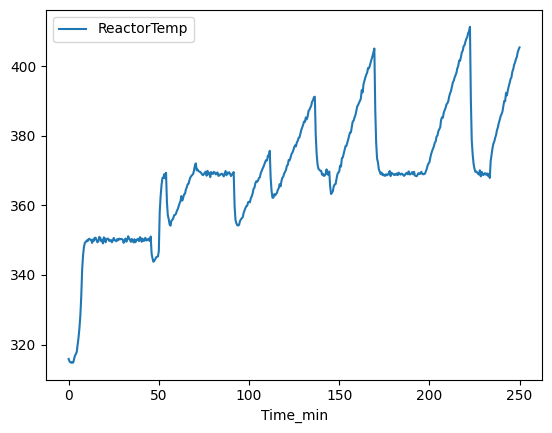

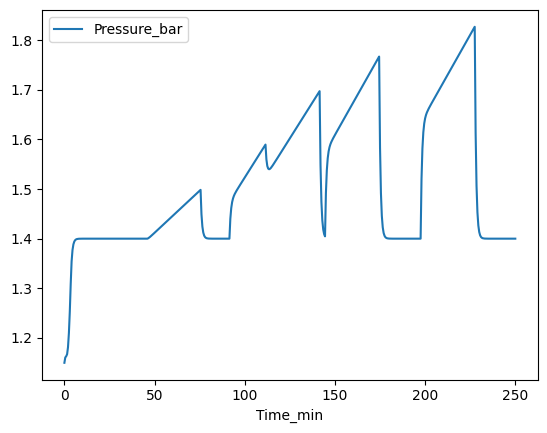

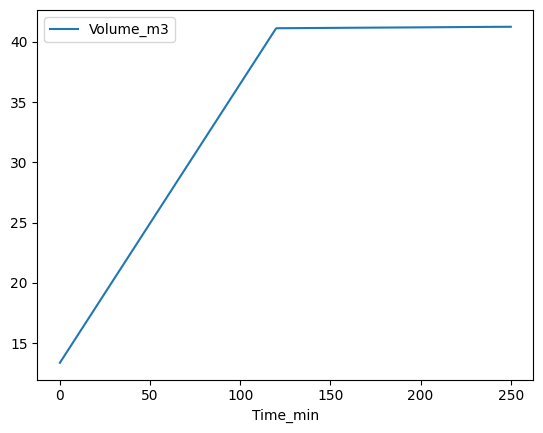

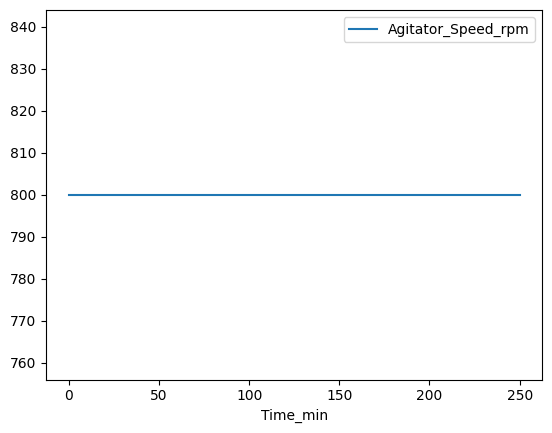

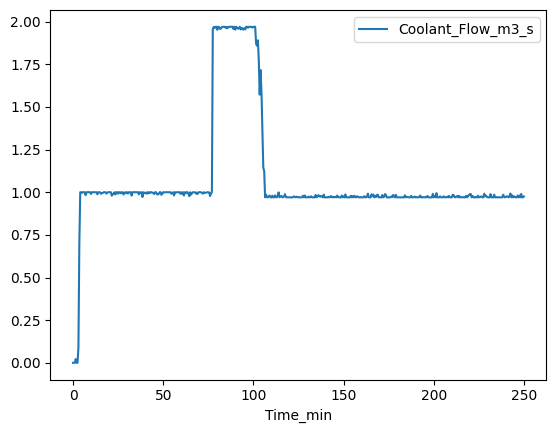

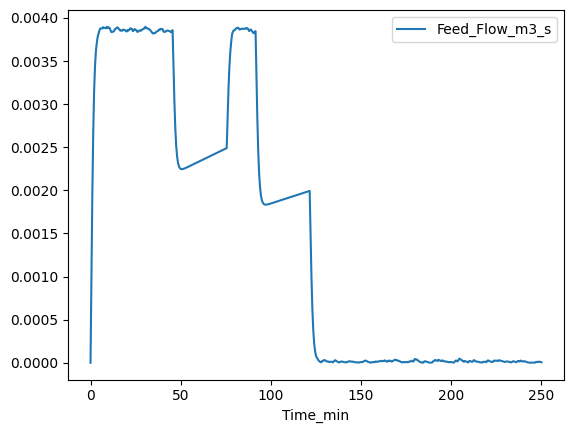

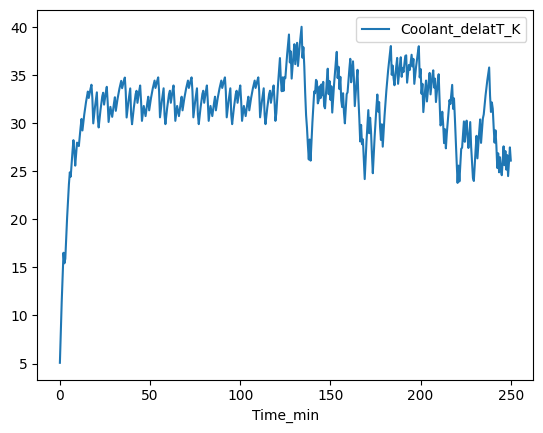

In [56]:
df.plot('Time_min','ReactorTemp')
df.plot('Time_min','Pressure_bar')
df.plot('Time_min','Volume_m3')
df.plot('Time_min','Agitator_Speed_rpm')
df.plot('Time_min','Coolant_Flow_m3_s')
df.plot('Time_min','Feed_Flow_m3_s')
df.plot('Time_min','Coolant_delatT_K')

In [ ]:
df['fault_type']=00

In [6]:
from src.load_and_label import load_and_label_data


In [7]:
df = load_and_label_data()

Loading and auto-labeling normal batch files...
  - Loaded and labeled normalbatch1.csv as Normal.
  - Loaded and labeled normalbatch2.csv as Normal.
  - Loaded and labeled normalbatch3.csv as Normal.
  - Loaded and labeled normalbatch4.csv as Normal.
  - Loaded and labeled normalbatch5.csv as Normal.
  - Loaded and labeled normalbatch6.csv as Normal.
  - Loaded and labeled normalbatch7.csv as Normal.

Loading manually labeled fault batch files...
  - Loaded agitatorfault_L.csv using your manual labels.
  - Loaded runawayfault_L.csv using your manual labels.

Successfully combined all data into a master table with 5409 rows.


In [7]:
df= pd.read_csv("raw/normal/normalbatch1.csv",header=0)
df

,Time_min,ReactorTemp,Pressure_bar,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Feed_Flow_m3_s,Coolant_delatT_K
0,0.0,313.343280,1.200000,8.916667,800,0.000000,0.000000,5.077143
1,0.5,314.277677,1.293476,8.994521,800,0.413430,0.002576,8.388683
2,1.0,318.062160,1.500000,9.070621,800,0.993892,0.002475,11.379813
3,1.5,323.607105,1.500000,9.149315,800,1.000000,0.002561,14.081088
4,2.0,328.205591,1.500000,9.225946,800,0.980534,0.002533,16.519993
...,...,...,...,...,...,...,...,...
596,298.0,313.535758,1.223113,27.646414,800,0.003448,0.000000,10.606815
597,298.5,313.321166,1.221163,27.647001,800,0.000000,0.000000,11.050408
598,299.0,313.308338,1.219563,27.647620,800,0.004351,0.000000,10.512819
599,299.5,313.422563,1.219041,27.648095,800,0.000000,0.000000,10.962858


In [13]:
type(master_dataset)

pandas.core.frame.DataFrame

In [14]:
master_dataset.to_csv("data/masterset.csv",index=False)

In [8]:
scaler = MinMaxScaler()
FEATURES = [
    'ReactorTemp', 'Pressure_bar', 'Volume_m3', 'Agitator_Speed_rpm',
    'Coolant_Flow_m3_s', 'Feed_Flow_m3_s', 'Coolant_delatT_K'
]
LABEL_COLUMN = 'fault_type'
df[FEATURES] = scaler.fit_transform(df[FEATURES])

In [9]:
df

,Time_min,ReactorTemp,Pressure_bar,Volume_m3,Agitator_Speed_rpm,Coolant_Flow_m3_s,Feed_Flow_m3_s,Coolant_delatT_K,fault_type,source_file
0,0.0,0.129763,0.077939,0.000000,0.987654,0.000000,0.000000e+00,0.067483,0,normalbatch1.csv
1,0.5,0.135734,0.150794,0.004130,0.987654,0.344525,9.403998e-01,0.117143,0,normalbatch1.csv
2,1.0,0.159915,0.311757,0.008167,0.987654,0.828243,9.034096e-01,0.161998,0,normalbatch1.csv
3,1.5,0.195344,0.311757,0.012341,0.987654,0.833333,9.349598e-01,0.202507,0,normalbatch1.csv
4,2.0,0.224727,0.311757,0.016406,0.987654,0.817112,9.245701e-01,0.239081,0,normalbatch1.csv
...,...,...,...,...,...,...,...,...,...,...
5404,298.0,0.971329,0.973580,0.993538,0.987654,0.811207,1.593887e-73,0.945201,2,runawayfault_L.csv
5405,298.5,0.977440,0.980185,0.993570,0.987654,0.808333,8.001445e-74,0.951853,2,runawayfault_L.csv
5406,299.0,0.982800,0.986790,0.993602,0.987654,0.811959,4.016726e-74,0.943791,2,runawayfault_L.csv
5407,299.5,0.996578,0.993395,0.993628,0.987654,0.808333,2.016365e-74,0.950540,2,runawayfault_L.csv


In [32]:
sequences = []
labels = []
sequence_length=20

# Group by source file to prevent creating sequences across different batches.
for _, group in df.groupby('source_file'):
    feature_data = group[FEATURES].values
    label_data = group[LABEL_COLUMN].values
    
    for i in range(len(group) - sequence_length):
        sequences.append(feature_data[i:i + sequence_length])
        labels.append(label_data[i + sequence_length])
        
X = np.array(sequences)
y = np.array(labels)
print(f"  - Created {len(X)} sequences from the data.")

  - Created 5229 sequences from the data.


In [37]:
X.shape

(5229, 20, 7)

In [14]:
feature_data = group[FEATURES].values

In [18]:
y = to_categorical(y, num_classes=3)

In [28]:
y[4710]

array([1., 0., 0.])

In [34]:
np.savetxt('output.txt', y, fmt='%d')

In [33]:
y

array([0, 0, 0, ..., 2, 2, 2])

<Axes: xlabel='Time_min'>

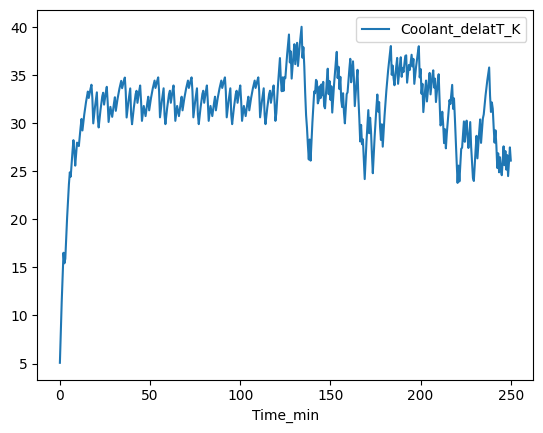

In [40]:
df=pd.read_csv("raw/test/normalbatch8.csv",header=0)
df.plot('Time_min',"Coolant_delatT_K")